In [2]:
import requests
import hashlib

url = "https://coinmarketcap.com/"

response = requests.get(url)
content = response.text

# Create a hash of the content
content_hash = hashlib.md5(content.encode()).hexdigest()

print(f"Content hash: {content_hash}")



Content hash: 298d0b2ae1c2716360e436a375b58c09


I waited one minute in between these two requests and got a different hash. This is expected as the page constantly updates itself.

In [31]:
url = "https://coinmarketcap.com/"

response = requests.get(url)
content = response.text

# Create a hash of the content
content_hash = hashlib.md5(content.encode()).hexdigest()

print(f"Content hash: {content_hash}")

Content hash: 1bc289d39e2e1425782cf6229523d791


In [30]:
url = "https://time.is/"
response = requests.get(url)
content = response.text

# Create a hash of the content
content_hash = hashlib.md5(content.encode()).hexdigest()

print(f"Content hash: {content_hash}")

Content hash: ec6c267b8d421fbdcddb78b27db44b73


The same experiment for the time.is website fails to update, despite the fact that the page is constantly updating.

In [29]:
url = "https://time.is/"
response = requests.get(url)
content = response.text

# Create a hash of the content
content_hash = hashlib.md5(content.encode()).hexdigest()

print(f"Content hash: {content_hash}")

Content hash: ec6c267b8d421fbdcddb78b27db44b73


In [36]:
import time

url = "https://weather.com/en-GB/weather/hourbyhour/l/82ce477283f4943abb3e6b33ab0958d41e2ae224b2429d8b7decd8fb42e2493f"
response = requests.get(url)
content = response.text
content_hash = hashlib.md5(content.encode()).hexdigest()
print(f"Content hash: {content_hash}")

time.sleep(5)
url_2 = "https://weather.com/en-GB/weather/hourbyhour/l/82ce477283f4943abb3e6b33ab0958d41e2ae224b2429d8b7decd8fb42e2493f"
response_2 = requests.get(url)
content_2 = response_2.text
content_hash_2 = hashlib.md5(content_2.encode()).hexdigest()
print(f"Content_2 hash: {content_hash_2}")


Content hash: 7ea86a5b8c64eb61d45b5bfcea46807f
Content_2 hash: 2a588be8a4a7bf8ca5a362af362fd99e


Conclusion:
- When the content of a page has changed, and required the page to be reloaded, the hash will change.
- When the content of a page has changed, but does not require the page to be reloaded, the hash will not change.

Checking whether the hash has changed is not could be used to determine whether the page has changed.


### Testing out the hash on current html of lse_crawler output

In [4]:
#open the jl file 
import json
import hashlib
import time
import os
dictionary = os.open('/Users/jamie/Desktop/chatlse2024/chat-lse/crawler/data/boxes.jl', os.O_RDWR)

#read the file
data = os.read(dictionary, 1000000)

#get the entry from the html key of the first dictionary entry
entry = json.loads(data.decode().split("\n")[0])
print(entry['html'], entry['current_hash'])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jamie/Desktop/chatlse2024/chat-lse/data/boxes.jl'

In [21]:
#copy the html and alter by a few characters, to see if the hash indeed changes
html = entry['html']
html = html.replace("component__title", "replaced__title")
print(html)

#hash the html
html_hash = hashlib.md5(html.encode()).hexdigest()
print(html_hash)

<div class="component__details">
            	<h2 class="replaced__title"><span class="global">What's going on at FLIA?</span> Latest engagement, impact, and publications</h2>
              			            </div>
22a74c40149671388c060fd68ba312c0


As we can see, by simple changing one word within the html, the hash changes. Therefore, we can reliably use the hash to determine whether the page has changed.


### Testing the lse_crawler update

First we must clear all history to the lse_crawler. Then we will run the lse_crawler

In [12]:
import sqlite3



conn = sqlite3.connect('/Users/jamie/Desktop/chatlse2024/chat-lse/crawler/data/dsi_crawler.db')
cursor = conn.cursor()

# Drop tables
cursor.execute('DROP TABLE IF EXISTS Webpage')
cursor.execute('DROP TABLE IF EXISTS Box')
cursor.execute('DROP TABLE IF EXISTS CrawlerMetadata')
cursor.execute('DROP TABLE IF EXISTS Links')

conn.commit()
conn.close()


In [14]:
import os

files_to_remove = ['data/pages.jl', 'data/boxes.jl']

for file_path in files_to_remove:
    if os.path.exists(file_path):
        os.remove(file_path)



Rerunning the lse_crawler. 
- Within the settings.py file, change LOG_LEVEL to 'INFO' to see the logs of the pipeline.
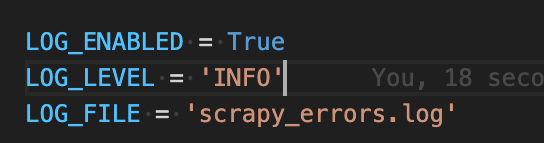
- run the lse_crawler in terminal using:
```
scrapy crawl lse_crawler --loglevel=INFO
```